<b>Topik</b>
Implementation of Ensemble Method on Classification Task

<b>Anggota Kelompok 1</b>
1. Chiquito Shaduq Aurick Fulvian - 1301210284
2. Muhammad Alauddin Angka Kurniawan - 1301210037
3. Zaidan Rizq - 1301213203

## <b>Latar Belakang</b>
<p>Proyek ini dibuat untuk memenuhi tugas Project Based Assignment CLO-4 mata kuliah Pembelajaran Mesin prodi S1 Informatika Fakultas Informatika Telkom University Bandung.</p>
<p>Dataset yang digunakan untuk proyek ini adalah dataset "Rice (Cammeo and Osmancik)" yang didapatkan di tautan berikut,
https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik</p>
<p>Jenis prediksi yang dilakukan pada dataset ini adalah prediksi <b> klasifikasi </b> dengan menggunakan model Random Forest</p>

##### <b> Deskripsi Dataset </b>
A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.

##### <b> Informasi Tambahan </b>
Di antara beras bersertifikat yang ditanam di TURKI, spesies Osmancik, yang memiliki area penanaman yang luas sejak tahun 1997 dan spesies Cammeo yang ditanam sejak tahun 2014 telah dipilih untuk penelitian ini. Jika melihat karakteristik umum spesies Osmancik, mereka memiliki tampilan yang lebar, panjang, seperti kaca, dan kusam. Jika melihat karakteristik umum spesies Cammeo, mereka memiliki penampilan yang lebar dan panjang, seperti kaca dan kusam. Sebanyak 3810 gambar bulir padi diambil untuk kedua spesies tersebut, diproses dan kesimpulan fitur dibuat. 7 fitur morfologi diperoleh untuk setiap butir beras.

Missing value : tidak ada

Terdapat 7 Fitur dan 3810 Record

Informasi Variabel
- Area - Mengembalikan jumlah piksel di dalam batas-batas butiran beras : Integer
- Perimeter - Menghitung keliling dengan menghitung jarak antara piksel di sekitar batas bulir beras: Continuous
- Major_Axis_Length - Garis terpanjang yang dapat ditarik pada butiran beras, yaitu jarak sumbu utama : Continuous
- Minor_Axis_Length - Garis terpendek yang dapat ditarik pada butiran beras, yaitu jarak sumbu kecil : Continuous
- Eccentricity - Mengukur seberapa bulat elips, yang memiliki momen yang sama dengan butiran beras : Continous
- Convex_Area - Mengembalikan jumlah piksel cangkang cembung terkecil dari wilayah yang dibentuk oleh butiran beras : Integer
- Extent - Mengembalikan rasio wilayah yang dibentuk oleh butiran beras ke kotak pembatas : Continuous
- Class - Cammeo and Osmancik : Binary (<b> Target </b>)

## <b>Explarotory Data Analysis (EDA)</b>

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Statistical analysis
import scipy.stats as stats

# Machine Learning - Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

# Machine Learning - Model Selection and Evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Machine Learning - Models
from sklearn.ensemble import RandomForestClassifier as RF

# Dataset fetching
from ucimlrepo import fetch_ucirepo

# Miscellaneous
import warnings
warnings.filterwarnings('ignore')

In [2]:
# fetch dataset atau load dataset
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

In [3]:
rice_cammeo_and_osmancik

{'data': {'ids': None,
  'features':        Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
  0     15231  525.578979         229.749878          85.093788      0.928882   
  1     14656  494.311005         206.020065          91.730972      0.895405   
  2     14634  501.122009         214.106781          87.768288      0.912118   
  3     13176  458.342987         193.337387          87.448395      0.891861   
  4     14688  507.166992         211.743378          89.312454      0.906691   
  ...     ...         ...                ...                ...           ...   
  3805  11441  415.858002         170.486771          85.756592      0.864280   
  3806  11625  421.390015         167.714798          89.462570      0.845850   
  3807  12437  442.498993         183.572922          86.801979      0.881144   
  3808   9882  392.296997         161.193985          78.210480      0.874406   
  3809  11434  404.709992         161.079269          90.868195      0.825

In [4]:
df = rice_cammeo_and_osmancik.data.features
df["Class"] = rice_cammeo_and_osmancik.data.targets
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,3810.0,12667.727559,1732.367706,7551.000000,11370.500000,12421.500000,13950.000000,18913.000000
Perimeter,3810.0,454.239180,35.597081,359.100006,426.144752,448.852493,483.683746,548.445984
Major_Axis_Length,3810.0,188.776222,17.448679,145.264465,174.353855,185.810059,203.550438,239.010498
Minor_Axis_Length,3810.0,86.313750,5.729817,59.532406,82.731695,86.434647,90.143677,107.542450
Eccentricity,3810.0,0.886871,0.020818,0.777233,0.872402,0.889050,0.902588,0.948007
Convex_Area,3810.0,12952.496850,1776.972042,7723.000000,11626.250000,12706.500000,14284.000000,19099.000000
Extent,3810.0,0.661934,0.077239,0.497413,0.598862,0.645361,0.726562,0.861050


In [6]:
#cek missing value
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

In [7]:
#cek data duplikat
print("Jumlah duplikasi entri di dalam data:",len(df[df.duplicated()]))

Jumlah duplikasi entri di dalam data: 0


In [8]:
#Jumlah data tiap jenis beras
df.groupby("Class").count()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
Class,,,,,,,
Cammeo,1630,1630,1630,1630,1630,1630,1630
Osmancik,2180,2180,2180,2180,2180,2180,2180


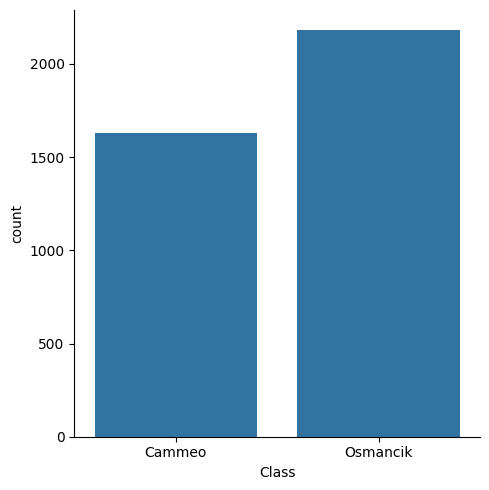

In [9]:
#visualisasi bar chart
sns.catplot(data=df, x='Class', kind='count');

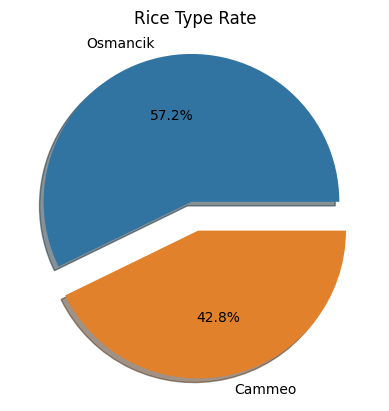

In [10]:
#Visualisasi pie chart dan presentase data
cmap = ["#3274a1", "#e1812c","#3a923a","#c03d3e","#857aab","#8d7866"]
classTarget = df["Class"].value_counts()
plt.pie(x = classTarget,
        explode = [0.1, 0.1],
        labels = classTarget.index,
        colors = cmap,
        autopct = "%.1f%%", 
        shadow = True)
plt.title("Rice Type Rate");

In [11]:
#info mengenai data
def dataInfo(df):
    data_info = pd.DataFrame(index=df.columns)
    data_info['TipeData'] = df.dtypes #tipe data tiap kolom
    return data_info

# Bentuk data
print("Total baris dan kolom :",df.shape,"\n")
# tampilkan fungsi dataInfo
dataInfo(df)

Total baris dan kolom : (3810, 8) 



,TipeData
Area,int64
Perimeter,float64
Major_Axis_Length,float64
Minor_Axis_Length,float64
Eccentricity,float64
Convex_Area,int64
Extent,float64
Class,object


<Axes: >

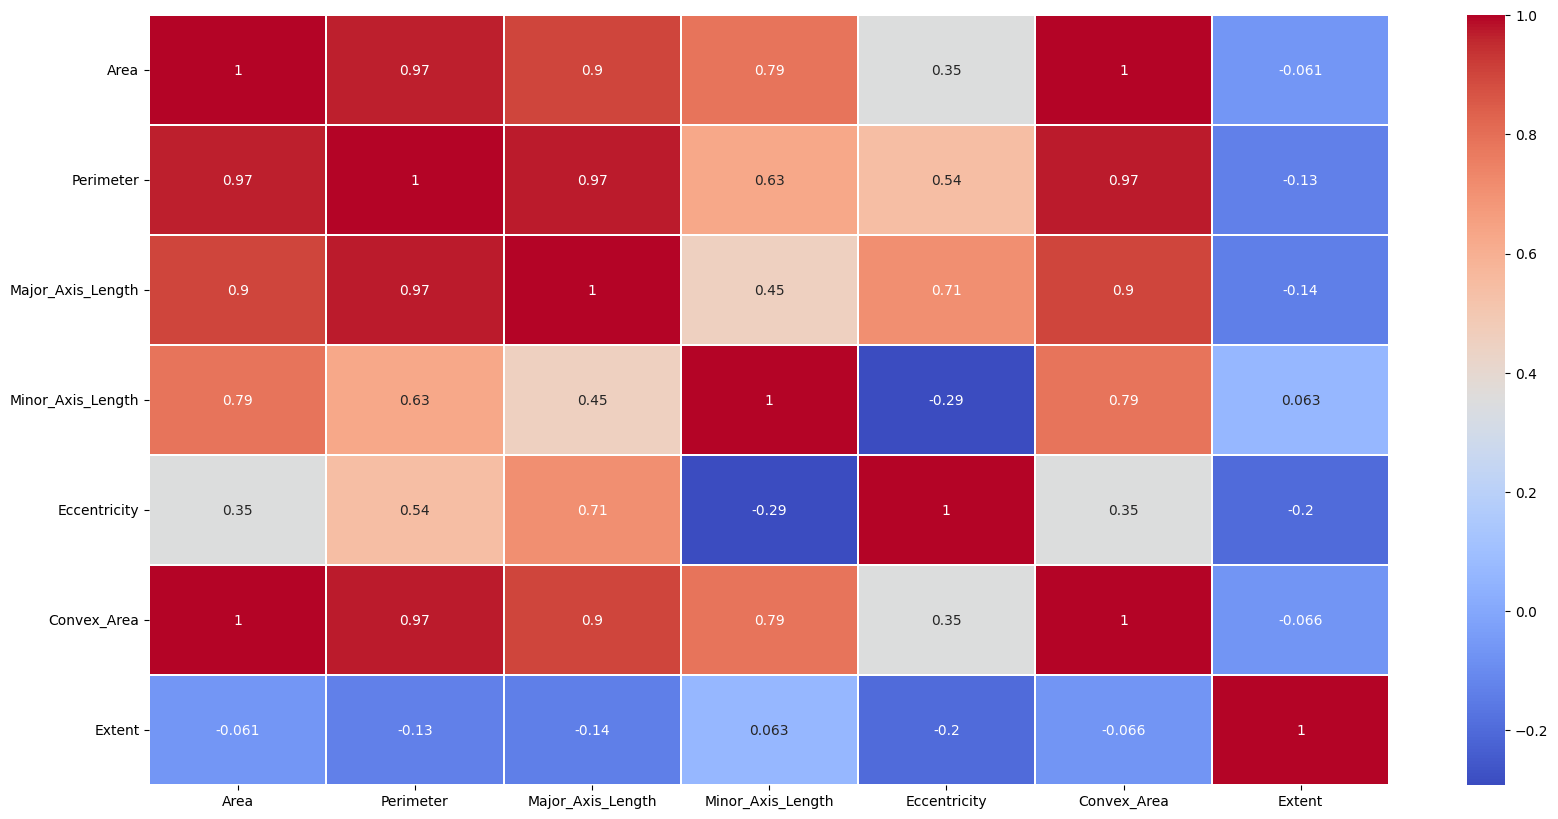

In [12]:
#cari korelasi antar data
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

Terdapat beberapa fitur yang memiliki korelasi tinggi, yaitu AREA, PERIMETER, MAJOR_AXIS_LENGTH, MINOR_AXIS_LENGTH, dan CONVEX AREA

<Figure size 250x200 with 0 Axes>

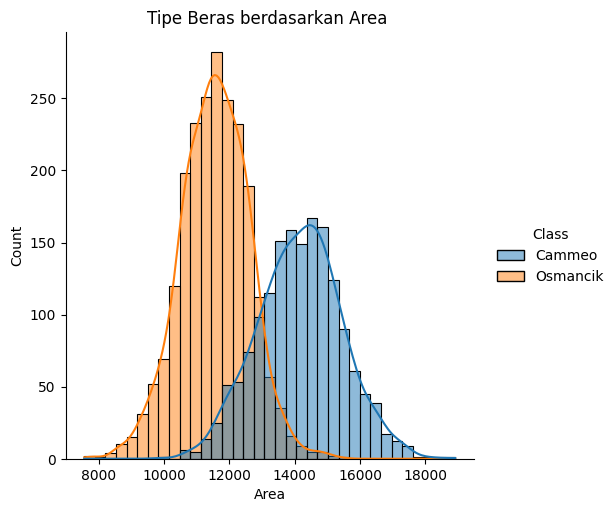

<Figure size 250x200 with 0 Axes>

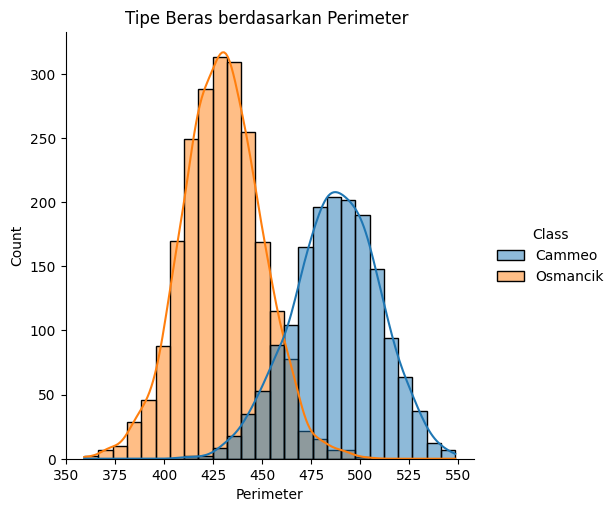

<Figure size 250x200 with 0 Axes>

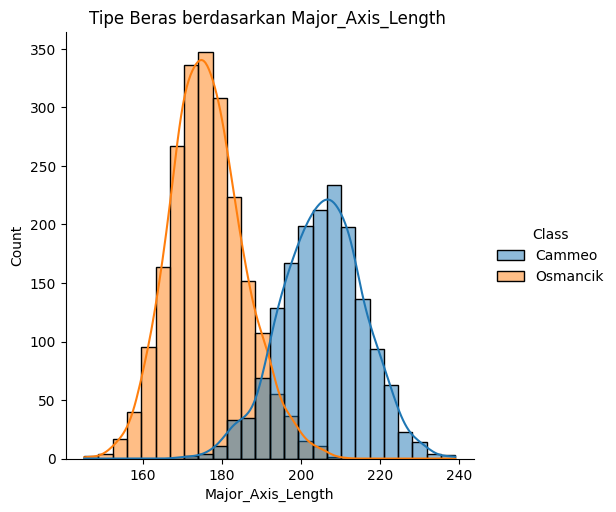

<Figure size 250x200 with 0 Axes>

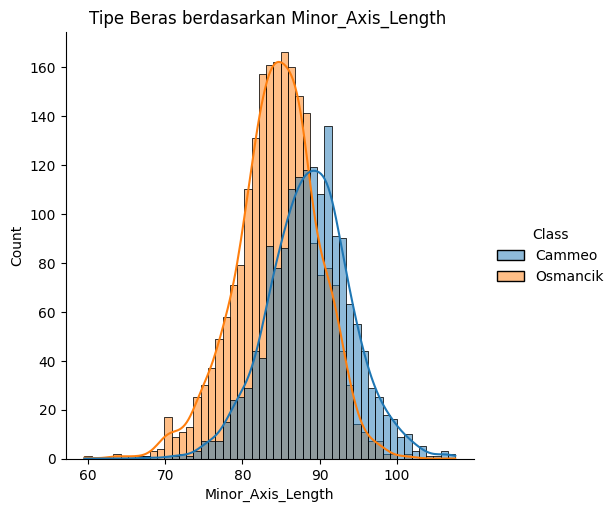

<Figure size 250x200 with 0 Axes>

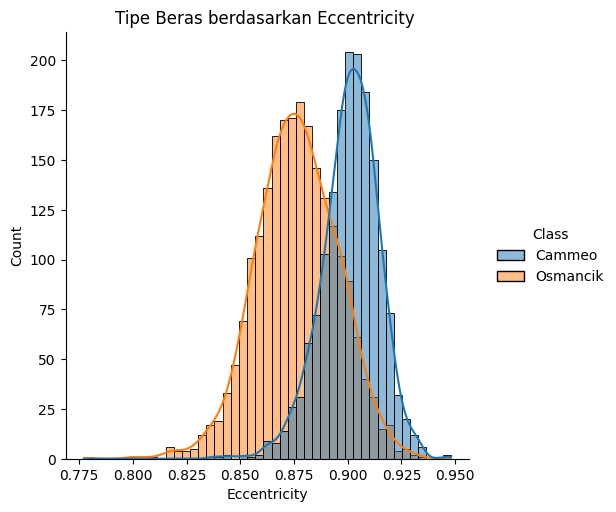

<Figure size 250x200 with 0 Axes>

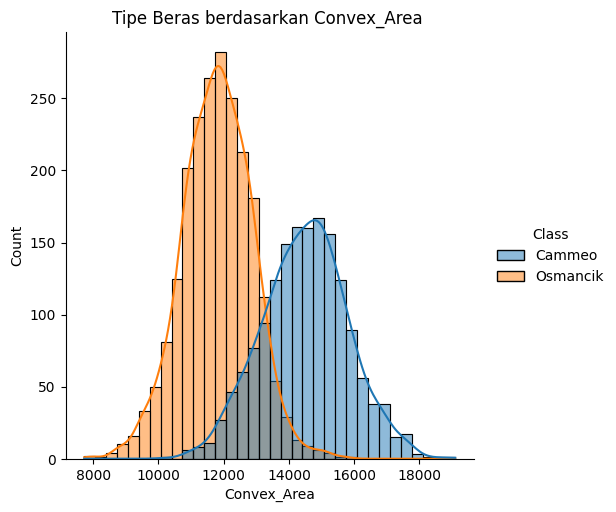

<Figure size 250x200 with 0 Axes>

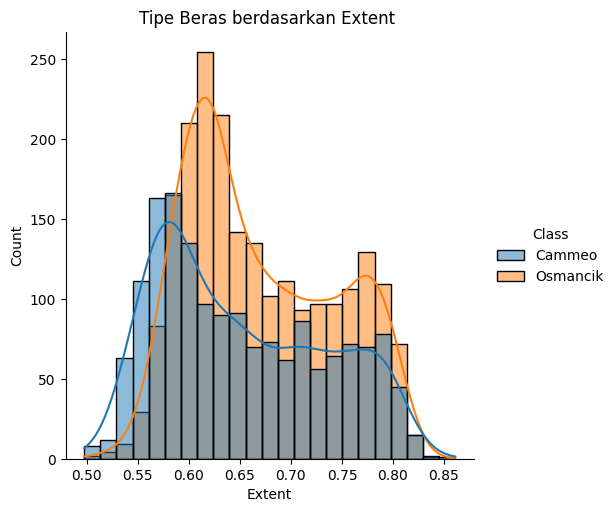

In [13]:
columns = df.columns[:len(df.columns) - 1]
for column in columns:
    plt.figure(figsize = (5,4), dpi = 50)
    sns.displot(data = df, 
                x = str(column), 
                kde = True, 
                hue = "Class").set(title = "Tipe Beras berdasarkan {} ".format(str(column)))
    plt.show()

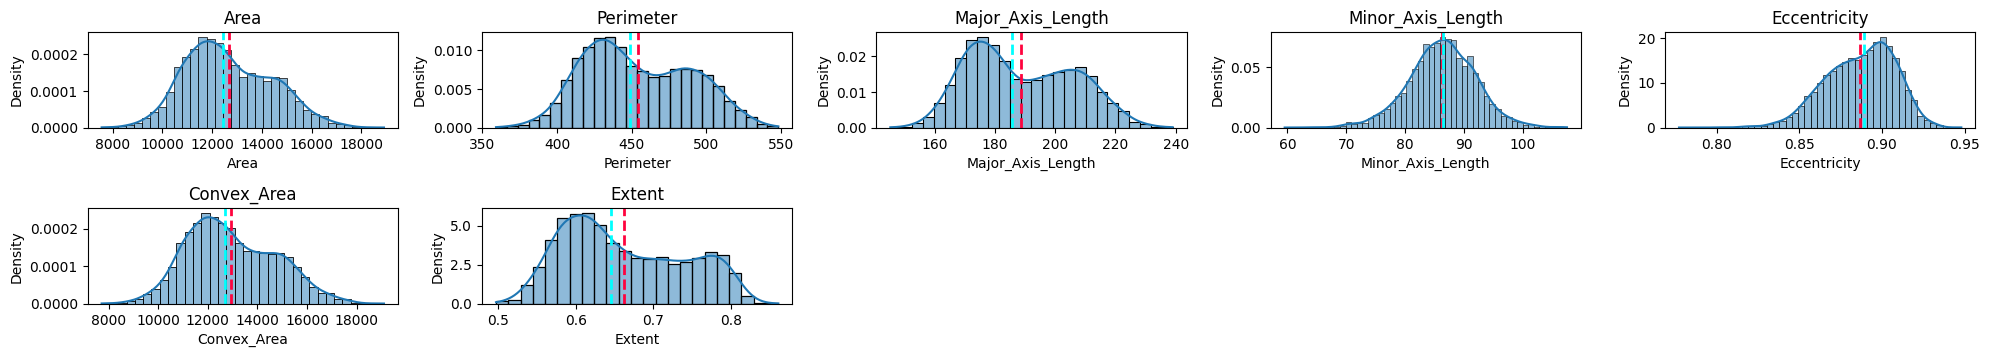

In [14]:
#visualisasi distribusi data
numerical_features=[col for col in df.columns if df[col].dtype!='O']
fig = plt.figure(figsize = (20,5))
for index,column in enumerate(numerical_features) :
    plt.subplot(3,5,index+1)
    sns.histplot(df[column], kde=True, stat="density")
    feature = df[column]
    ax = fig.gca()
    ax.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=2)  #warna merah untuk mean
    ax.axvline(feature.median(), color='#00ffff', linestyle='dashed', linewidth=2) #biru untuk median
    plt.title(f'{column.title()}')
    plt.tight_layout()

In [15]:
# cek skew dan kurtosis dari fitur numerik
num_data=df[numerical_features]
num_data.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Area,0.325158,-0.431082
Perimeter,0.221362,-0.840243
Major_Axis_Length,0.260242,-0.951802
Minor_Axis_Length,-0.134897,0.562113
Eccentricity,-0.449249,0.071073
Convex_Area,0.319782,-0.465824
Extent,0.343819,-1.030101


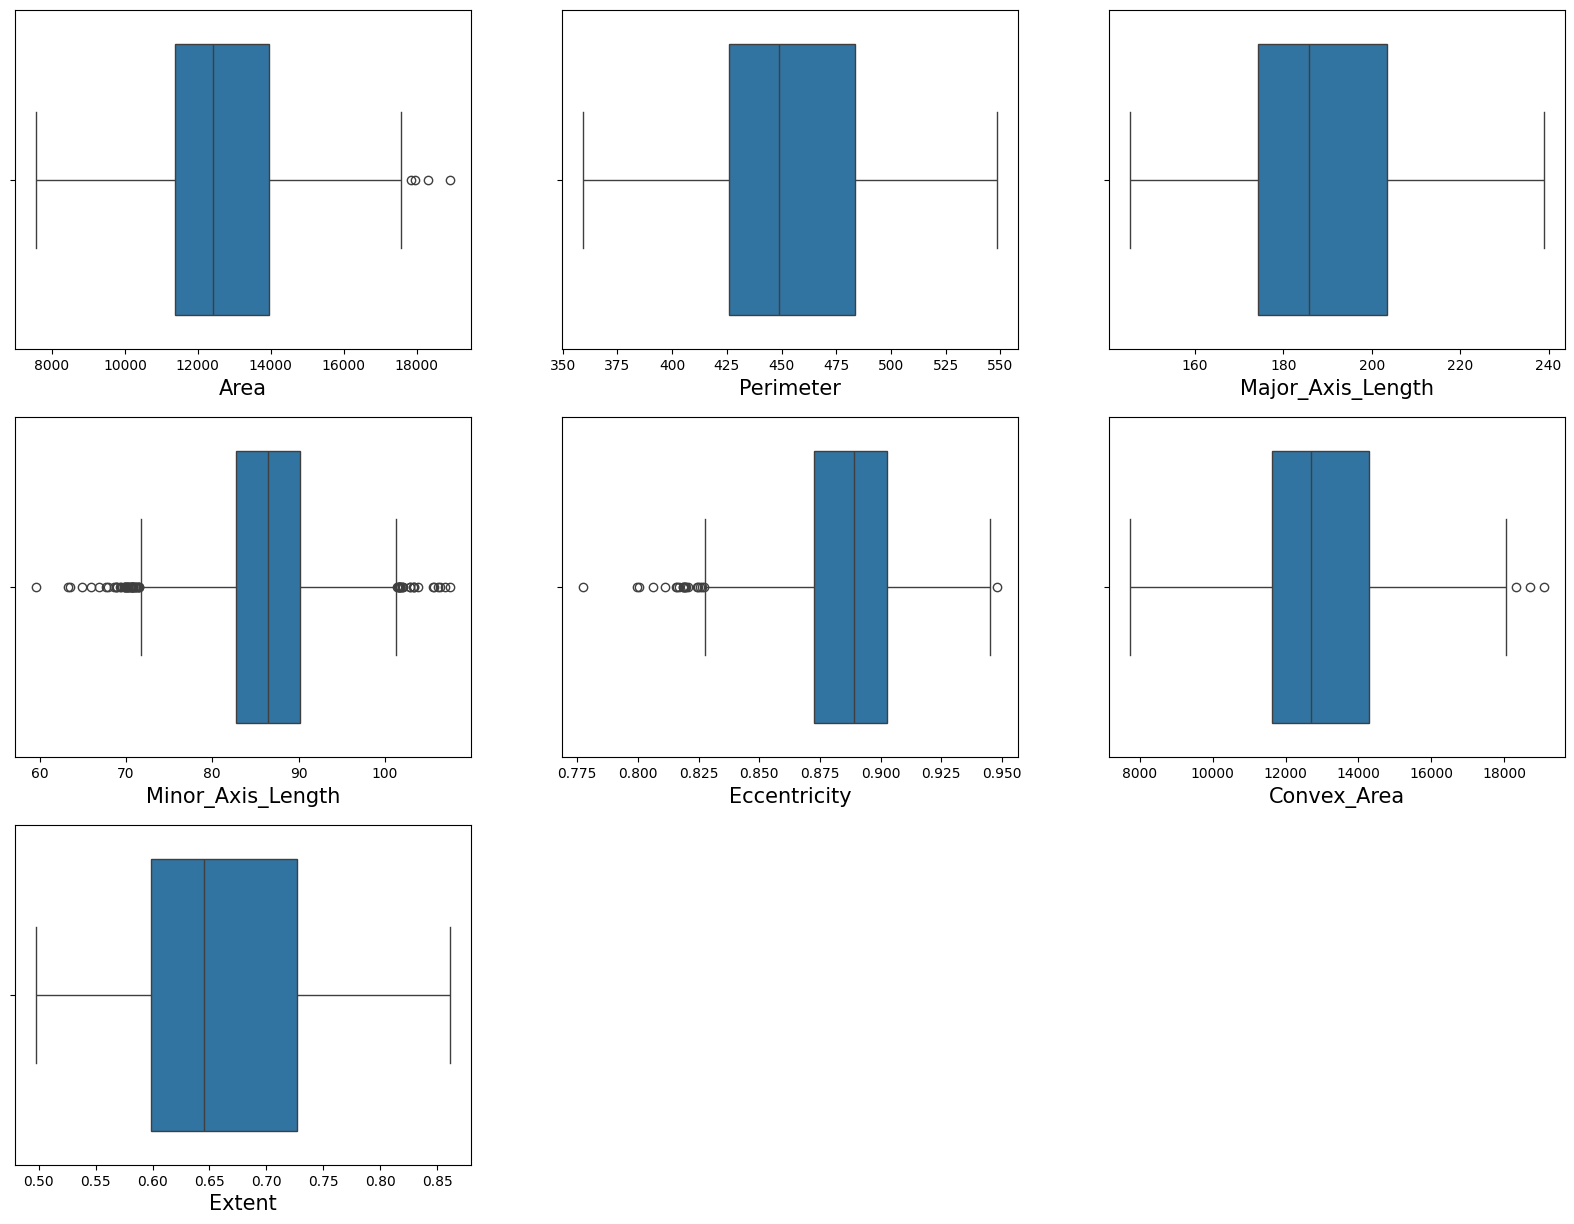

In [16]:
plt.figure(figsize = (20,15))
for i, col in enumerate(df.iloc[:, 0:7]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data = df.iloc[:, 0:7], x = col)
    plt.xlabel(col, fontsize = 15)
    plt.xticks(fontsize = 10)

In [17]:
# Berapa banyak outliers pada tiap fitur?
def detectOutliers(df):
    outliers = pd.DataFrame(columns = ["Fitur", "Banyak Outliers"])
    features = []
    numbers = []
    for col in df.columns:
        features.append(col)
        #Mengembalikan value ke quantile
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_fence = q1 - (1.5 * iqr)
        upper_fence = q3 + (1.5 * iqr)
        num_of_out = df.loc[(df[col] < lower_fence) | (df[col] > upper_fence)].shape[0]
        numbers.append(num_of_out)

        lower_fence = df.loc[(df[col] < lower_fence), col]
        upper_fence = df.loc[(df[col] > upper_fence), col] 

    outliers["Fitur"] = features
    outliers["Banyak Outliers"] = numbers
    print("Banyaknya Outliers:", outliers["Banyak Outliers"].sum())
    print("Presentase outliers: % {:.3f}".format(outliers["Banyak Outliers"].sum()/df.shape[0]))
    return outliers  
detectOutliers(df.iloc[:, 0:7])

Banyaknya Outliers: 93
Presentase outliers: % 0.024


,Fitur,Banyak Outliers
0,Area,4
1,Perimeter,0
2,Major_Axis_Length,0
3,Minor_Axis_Length,65
4,Eccentricity,21
5,Convex_Area,3
6,Extent,0


## <b>Data Pre-processing</b>

In [18]:
#Drop kolom Perimeter, Major, Minor, Convex
df = df.drop(columns=['Perimeter'])
df = df.drop(columns=['Major_Axis_Length'])
df = df.drop(columns=['Minor_Axis_Length'])
df = df.drop(columns=['Convex_Area'])

In [19]:
df["Class"] = df["Class"].astype("category")
df["Class"] = df["Class"].cat.codes
df

,Area,Eccentricity,Extent,Class
0,15231,0.928882,0.572896,0
1,14656,0.895405,0.615436,0
2,14634,0.912118,0.693259,0
3,13176,0.891861,0.640669,0
4,14688,0.906691,0.646024,0
...,...,...,...,...
3805,11441,0.864280,0.681012,1
3806,11625,0.845850,0.694279,1
3807,12437,0.881144,0.626739,1
3808,9882,0.874406,0.659064,1


3.1 Outliers

In [20]:
# Membuat fence list
def fenceList(df):
    feature_list = []
    q1_list = []
    q3_list = []
    iqr_list = []
    low_list = []
    up_list = []
    for col in df.iloc[:, 1:14].columns:
        feature_list.append(col)
        q1 = df[col].quantile(0.25)
        q1_list.append(q1)
        q3 = df[col].quantile(0.75)
        q3_list.append(q3)
        iqr = q3 - q1
        iqr_list.append(iqr)

        lower_fence = q1 - (1.5 * iqr)
        low_list.append(lower_fence)
        upper_fence = q3 + (1.5 * iqr)
        up_list.append(upper_fence)

        list_of_lists = [q1_list, q3_list, iqr_list, low_list, up_list]
        fence_list = pd.DataFrame(list_of_lists, index = ["q1", "q2", "iqr", "lowerFence", "upperFence"],
                columns = feature_list)
    return fence_list

In [21]:
fenceList(df)

,Eccentricity,Extent,Class
q1,0.872402,0.598862,0.0
q2,0.902588,0.726562,1.0
iqr,0.030186,0.127699,1.0
lowerFence,0.827122,0.407313,-1.5
upperFence,0.947868,0.918111,2.5


In [22]:
detectOutliers(df.iloc[:, 0:7])

Banyaknya Outliers: 25
Presentase outliers: % 0.007


,Fitur,Banyak Outliers
0,Area,4
1,Eccentricity,21
2,Extent,0
3,Class,0


In [23]:
# Hapus outlier
def removeOutliers(df):
    for col in df.iloc[:, 1:14].columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        lower_fence = q1 - (1.5 * iqr)
        upper_fence = q3 + (1.5 * iqr)

        df = df[(df[col] > lower_fence) & (df[col] < upper_fence)]
    return df

In [24]:
df = removeOutliers(df)
df

,Area,Eccentricity,Extent,Class
0,15231,0.928882,0.572896,0
1,14656,0.895405,0.615436,0
2,14634,0.912118,0.693259,0
3,13176,0.891861,0.640669,0
4,14688,0.906691,0.646024,0
...,...,...,...,...
3804,12501,0.902043,0.718820,1
3805,11441,0.864280,0.681012,1
3806,11625,0.845850,0.694279,1
3807,12437,0.881144,0.626739,1


3.2 Transformasi Distribusi Normal

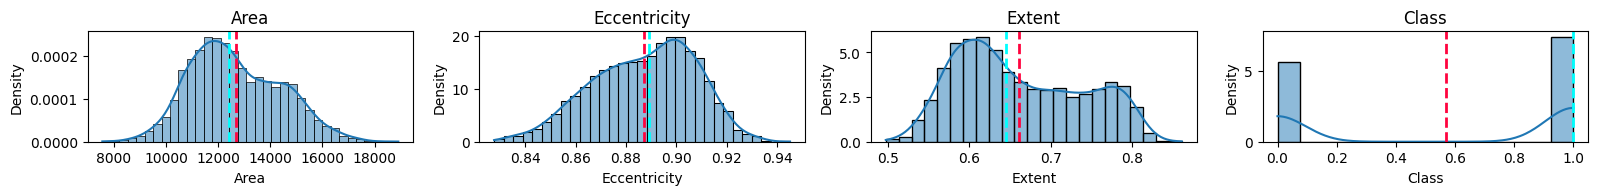

In [25]:
#visualisasi distribusi data
numerical_features=[col for col in df.columns if df[col].dtype!='O']
fig = plt.figure(figsize = (20,5))
for index,column in enumerate(numerical_features) :
    plt.subplot(3,5,index+1)
    sns.histplot(df[column], kde=True, stat="density")
    feature = df[column]
    ax = fig.gca()
    ax.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=2)  #warna merah untuk mean
    ax.axvline(feature.median(), color='#00ffff', linestyle='dashed', linewidth=2) #biru untuk median
    plt.title(f'{column.title()}')
    plt.tight_layout()

In [26]:
def plotvariable(df,variable):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)   #berarti 1 row, 2 Column and plot pertama
  df[variable].hist(bins=30)

  ##QQ plot
  plt.subplot(1,2,2)
  stats.probplot(df[variable], dist='norm',plot=plt)
  plt.show()

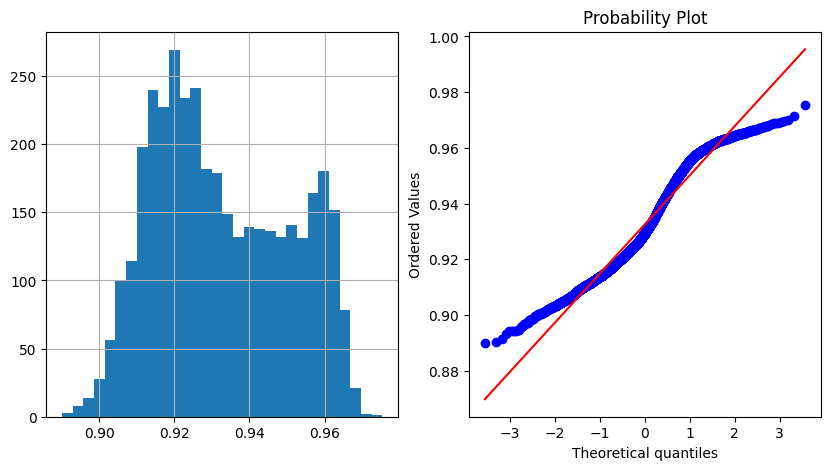

In [27]:
#Fitur extent di transformasi agar distribusi normal
df["Extent"]=np.cbrt(df['Extent']) #coba teknik akar pangkat dua untuk mengubah sekrup positif menjadi distribusi normal
df['Extent'] = np.sqrt(df['Extent'])
plotvariable(df,"Extent")

3.3 Splitting

In [28]:
#Split data menjadi X dan y
x = df.drop(["Class"], axis=1)
y = df["Class"]

In [29]:
x

,Area,Eccentricity,Extent
0,15231,0.928882,0.911337
1,14656,0.895405,0.922282
2,14634,0.912118,0.940768
3,13176,0.891861,0.928479
4,14688,0.906691,0.929768
...,...,...,...
3804,12501,0.902043,0.946462
3805,11441,0.864280,0.937978
3806,11625,0.845850,0.940999
3807,12437,0.881144,0.925084


In [30]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3804    1
3805    1
3806    1
3807    1
3808    1
Name: Class, Length: 3789, dtype: int8

In [31]:
# untuk memperbaiki parameter random_state
seed = 20

In [32]:
# Split menjadi train dan test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, stratify = y, random_state = seed)

3.4 Standardization

In [33]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_trainStandart = scaler.transform(x_train)
x_testStandart = scaler.transform(x_test)

In [34]:
x_trainStandart, len(x_trainStandart)

(array([[ 0.21225745, -2.65427672, -0.33196319],
        [-0.5268405 , -1.47628759,  0.45309042],
        [ 1.10169011,  1.40740002,  0.14191298],
        ...,
        [-0.49082877,  1.89098297,  0.95441759],
        [-0.00438456,  0.40929702,  0.16281331],
        [-1.00299564, -1.16779577, -0.23619966]]),
 2273)

In [35]:
x_testStandart, len(x_testStandart)

(array([[-1.15676003, -1.11345939, -0.56920456],
        [ 1.31204436,  1.5792876 , -1.57936816],
        [-0.99956595, -0.54805445, -0.69717008],
        ...,
        [-1.20020275, -0.20102853,  0.37920414],
        [-0.23874663,  2.18238523,  1.00886871],
        [-0.03468014, -0.39971079, -0.68366922]]),
 1516)

## Model Machine Learning
Metode yang digunakan adalah Random Forest

In [36]:
# Baseline Model
model = RF()
model.fit(x_trainStandart, y_train)

RandomForestClassifier()

In [37]:
y_predict = model.predict(x_testStandart)
y_predict

array([1, 0, 1, ..., 1, 0, 1], dtype=int8)

In [38]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_predict))

ACCURACY OF THE MODEL:  0.9241424802110818


In [39]:
#eksplorasi nilai n_estimators 
modelB = RF(n_estimators=10,max_depth=100,n_jobs = -1, max_samples= 100)
modelB.fit(x_trainStandart,y_train)
y_pred_2 = modelB.predict(x_testStandart)
print("ACCURACY OF MODEL 1 : ",accuracy_score(y_test,y_pred_2))

modelB = RF(n_estimators=100,max_depth=100,n_jobs = -1, max_samples= 100)
modelB.fit(x_trainStandart,y_train)
y_pred_2 = modelB.predict(x_testStandart)
print("ACCURACY OF MODEL 2 : ",accuracy_score(y_test,y_pred_2))

modelB = RF(n_estimators=500,max_depth=100,n_jobs = -1, max_samples= 100)
modelB.fit(x_trainStandart,y_train)
y_pred_2 = modelB.predict(x_testStandart)
print("ACCURACY OF MODEL 3 : ",accuracy_score(y_test,y_pred_2))


modelB = RF(n_estimators=1000,max_depth=100,n_jobs = -1, max_samples= 100)
modelB.fit(x_trainStandart,y_train)
y_pred_2 = modelB.predict(x_testStandart)
print("ACCURACY OF MODEL 4 : ",accuracy_score(y_test,y_pred_2))

ACCURACY OF MODEL 1 :  0.9063324538258575
ACCURACY OF MODEL 2 :  0.9274406332453826
ACCURACY OF MODEL 3 :  0.9274406332453826
ACCURACY OF MODEL 4 :  0.9261213720316622


In [40]:
#eksplorasi nilai max_features
modelB = RF(n_estimators=500,max_depth=100,n_jobs = -1, max_samples= 100,max_features="sqrt")
modelB.fit(x_trainStandart,y_train)
y_pred_3 = modelB.predict(x_testStandart)
print("ACCURACY OF MODEL 1 : ",accuracy_score(y_test,y_pred_3))

modelB = RF(n_estimators=500,max_depth=100,n_jobs = -1, max_samples= 100,max_features="log2")
modelB.fit(x_trainStandart,y_train)
y_pred_3 = modelB.predict(x_testStandart)
print("ACCURACY OF MODEL 2 : ",accuracy_score(y_test,y_pred_3)
)

modelB = RF(n_estimators=500,max_depth=100,n_jobs = -1, max_samples= 100,max_features=None)
modelB.fit(x_trainStandart,y_train)
y_pred_3 = modelB.predict(x_testStandart)
print("ACCURACY OF MODEL 3 : ",accuracy_score(y_test,y_pred_3)
)

modelB = RF(n_estimators=500,max_depth=100,n_jobs = -1, max_samples= 100,max_features=100)
modelB.fit(x_trainStandart,y_train)
y_pred_3 = modelB.predict(x_testStandart)
print("ACCURACY OF MODEL 4 : ",accuracy_score(y_test,y_pred_3))


ACCURACY OF MODEL 1 :  0.9274406332453826
ACCURACY OF MODEL 2 :  0.9254617414248021
ACCURACY OF MODEL 3 :  0.9300791556728232
ACCURACY OF MODEL 4 :  0.9313984168865436


In [41]:
#eksplorasi nilai criterion
modelB = RF(n_estimators=500,max_depth=100,n_jobs = -1, max_samples= 100,max_features=None,criterion="gini")
modelB.fit(x_trainStandart,y_train)
y_pred_3 = modelB.predict(x_testStandart)
print("ACCURACY OF MODEL 1 : ",accuracy_score(y_test,y_pred_3))

modelB = RF(n_estimators=500,max_depth=100,n_jobs = -1, max_samples= 100,max_features=None,criterion="entropy")
modelB.fit(x_trainStandart,y_train)
y_pred_3 = modelB.predict(x_testStandart)
print("ACCURACY OF MODEL 2 : ",accuracy_score(y_test,y_pred_3))

modelB =  RF(n_estimators=500,max_depth=100,n_jobs = -1, max_samples= 100,max_features=None,criterion="log_loss")
modelB.fit(x_trainStandart,y_train)
y_pred_3 = modelB.predict(x_testStandart)
print("ACCURACY OF MODEL 3 : ",accuracy_score(y_test,y_pred_3))

ACCURACY OF MODEL 1 :  0.9287598944591029
ACCURACY OF MODEL 2 :  0.9274406332453826
ACCURACY OF MODEL 3 :  0.9254617414248021


In [42]:
feature_scores = pd.Series(modelB.feature_importances_, index=x.columns).sort_values(ascending=False)

feature_scores

Area            0.666005
Eccentricity    0.255294
Extent          0.078701
dtype: float64

In [44]:
param_grid = {
    'n_estimators': [500],
    'max_features': [None],
    'criterion':['gini', 'entropy'],
    'max_samples' : [0.3],
    'max_depth': [None, 5, 10],  # Depth maksimum dari trees
    'min_samples_split': [2, 5, 10],  # Sampel minimum yang diperlukan untuk membagi node
    'min_samples_leaf': [1, 2, 4],  # Jumlah sampel minimum yang diperlukan pada setiap leaf node
    'max_leaf_nodes': [None, 5, 10],  # Angka maksimum dari leaf nodes
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=RF(), param_grid=param_grid, cv=3, scoring='accuracy',n_jobs = 10)

grid_search.fit(x_trainStandart,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=10,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10], 'max_features': [None],
                         'max_leaf_nodes': [None, 5, 10], 'max_samples': [0.3],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [500]},
             scoring='accuracy')

In [45]:
print("Parameter terbaik: ", grid_search.best_params_)
print("Skor terbaik: ", grid_search.best_score_)

Parameter terbaik:  {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 10, 'max_samples': 0.3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Skor terbaik:  0.9243251784284817


In [46]:
best_rf_model = grid_search.best_estimator_
test_accuracy = best_rf_model.score(x_trainStandart, y_train)
print("Tes Akurasi: ", test_accuracy)

Tes Akurasi:  0.9265288165420149


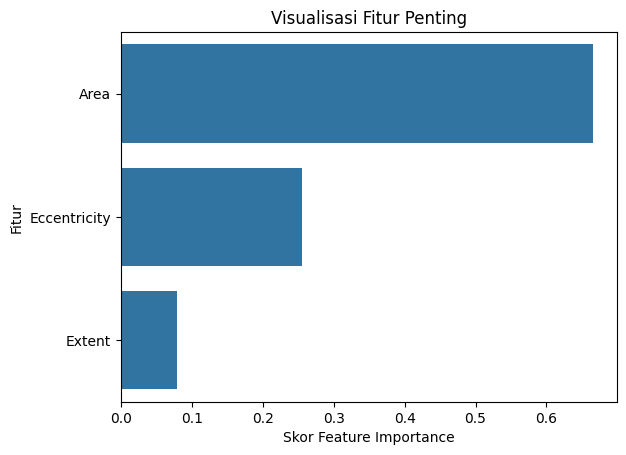

In [47]:
sns.barplot(x = feature_scores, y = feature_scores.index)

plt.xlabel('Skor Feature Importance')

plt.ylabel('Fitur')

plt.title("Visualisasi Fitur Penting")

plt.show()

In [48]:


cm = confusion_matrix(y_test,y_predict)

print('Confusion matrix \n',cm)

Confusion matrix 
 [[595  57]
 [ 58 806]]


In [49]:


print(classification_report(y_test, y_predict))



              precision    recall  f1-score   support

           0       0.91      0.91      0.91       652
           1       0.93      0.93      0.93       864

    accuracy                           0.92      1516
   macro avg       0.92      0.92      0.92      1516
weighted avg       0.92      0.92      0.92      1516



## Hasil dan Analisis
1. Pada eksplorasi parameter n_estimator, value terbaik adalah n_estimator = 1000. Hal ini berarti semakin banyak tree pada Random Forest, semaking tinggi juga akurasi yang dihasilkan.
2. Pada eksplorasi parameter max_features, value terbaik adalah max_features = None. Kemungkinan karena fitur pada dataset model hanya berjumlah 3 Fitur.
3. Pada eksplorasi parameter criterion, value terbaik adalah Gini. Namun, pada hyperparameter tuning menggunakan GridSearchCV didapatkan Entropy lebih unggul.
4. Berdasarkan hyperparameter tuning parameter untuk RandomForest terbaik berdasarkan param_grids yang diberikan adalah{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 10, 'max_samples': 0.3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}

## Kesimpulan
Beberapa poin yang dapat diambil dari dataset yang dianalisis adalah :
1. Terdapat banyak fitur yang memiliki korelasi yang tinggi,
2. Data pada tiap fitur memiliki distribusi yang relatif normal,
3. Jumlah outlier pada data sedikit,
4. Tuning parameter tidak terlalu mengubah akurasi prediksi model
5. Fitur yang paling mempengaruhi prediksi adalah 'Area'